In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [306]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [370]:
train_data = pd.read_csv('/Users/admin/Downloads/house-prices-advanced-regression-techniques/train.csv')

In [371]:
test_data = pd.read_csv("/Users/admin/Downloads/house-prices-advanced-regression-techniques/test.csv")

In [128]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [372]:
train_data = train_data[['SalePrice', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
                        'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtQual',
                        'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
                        'GarageArea', 'GarageCars', 'TotalBsmtSF']]

In [373]:
test_data = test_data[['LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
                        'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtQual',
                        'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
                        'GarageArea', 'GarageCars', 'TotalBsmtSF']]

In [374]:
train_data = train_data.fillna(0)

In [375]:
test_data = test_data.fillna(0)

In [376]:
test_data['KitchenQual'] = test_data['KitchenQual'].replace({'TA': 1, 'Gd': 2, 'Ex': 3, 'Fa': 4})
train_data['KitchenQual'] = train_data['KitchenQual'].replace({'TA': 1, 'Gd': 2, 'Ex': 3, 'Fa': 4})

In [377]:
test_data['CentralAir'] = test_data['CentralAir'].replace({'Y': 1, 'N': 2})
train_data['CentralAir'] = train_data['CentralAir'].replace({'Y': 1, 'N': 2})

In [378]:
test_data['BsmtQual'] = test_data['BsmtQual'].replace({'TA': 1, 'Gd': 2, 'Ex': 3, 'Fa': 4})
train_data['BsmtQual'] = train_data['BsmtQual'].replace({'TA': 1, 'Gd': 2, 'Ex': 3, 'Fa': 4})

In [382]:
test_data['KitchenQual'].unique()

array([1, 2, 3, 4, 0])

In [383]:
train_data.columns

Index(['SalePrice', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtQual', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageArea', 'GarageCars', 'TotalBsmtSF'],
      dtype='object')

In [384]:
train_data.head()

,SalePrice,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtQual,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageArea,GarageCars,TotalBsmtSF
0,208500,8450,2003,2003,196.0,1,856,854,1710,1,2,2,2,8,0,548,2,856
1,181500,9600,1976,1976,0.0,1,1262,0,1262,0,2,2,1,6,1,460,2,1262
2,223500,11250,2001,2002,162.0,1,920,866,1786,1,2,2,2,6,1,608,2,920
3,140000,9550,1915,1970,0.0,1,961,756,1717,1,1,1,2,7,1,642,3,756
4,250000,14260,2000,2000,350.0,1,1145,1053,2198,1,2,2,2,9,1,836,3,1145


In [385]:
corr = train_data.corr()

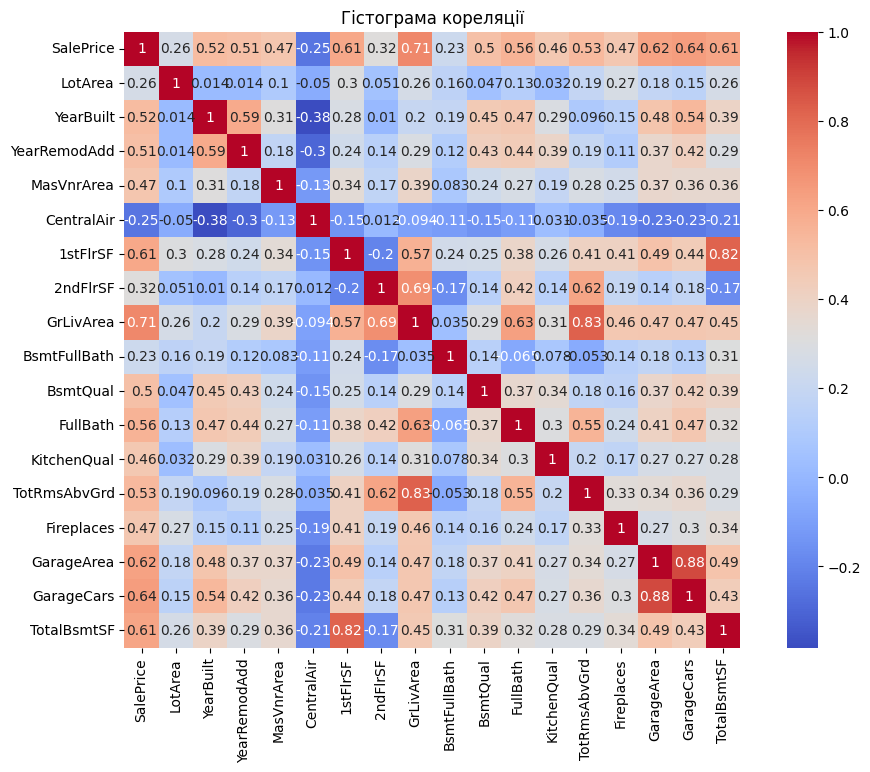

In [388]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title('Гістограма кореляції')
plt.show()

In [161]:
# train_data_linear = train_data.iloc[:, :16]

/Users/admin/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/admin/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


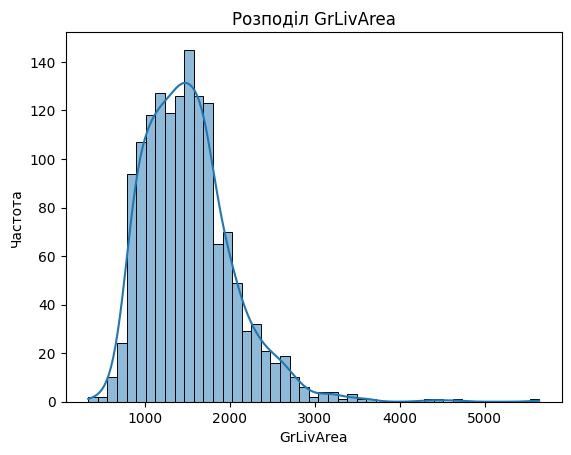

In [163]:
sns.histplot(train_data['GrLivArea'], kde=True) 

plt.xlabel('GrLivArea')
plt.ylabel("Частота")
plt.title(f"Розподіл {'GrLivArea'}")

plt.show()

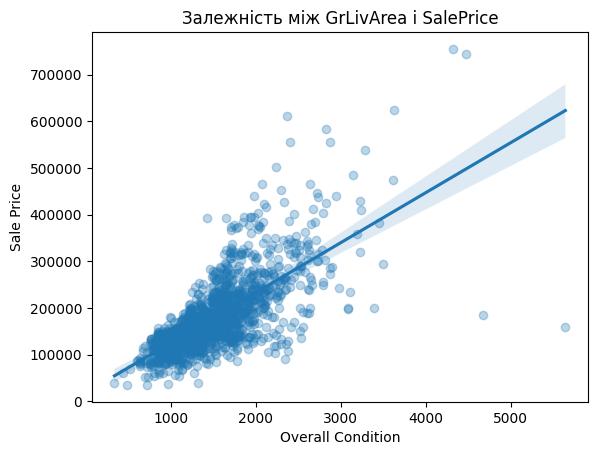

In [176]:
sns.regplot(data=train_data, x='GrLivArea', y='SalePrice', scatter_kws={'alpha':0.3})

plt.xlabel('Overall Condition')
plt.ylabel('Sale Price')
plt.title('Залежність між GrLivArea і SalePrice')

plt.show()

In [389]:
X_train_logist = train_data.drop(['SalePrice'], axis=1)
y_train_logist = train_data.SalePrice

In [282]:
# sp_columns = ['LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
#        '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'TotalBsmtSF']
# scaler = StandardScaler()

# for column in sp_columns:
#     X_train_logist[[column]] = scaler.fit_transform(X_train_logist[[column]])

In [290]:
X_train_logist.head()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,TotRmsAbvGrd,...,CentralAir_Y,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,BsmtQual_0,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA
0,8450,2003,2003,196,856,854,1710,1,2,8,...,1,0,0,1,0,0,0,0,1,0
1,9600,1976,1976,0,1262,0,1262,0,2,6,...,1,0,0,0,1,0,0,0,1,0
2,11250,2001,2002,162,920,866,1786,1,2,6,...,1,0,0,1,0,0,0,0,1,0
3,9550,1915,1970,0,961,756,1717,1,1,7,...,1,0,0,1,0,0,0,0,0,1
4,14260,2000,2000,350,1145,1053,2198,1,2,9,...,1,0,0,1,0,0,0,0,1,0


In [390]:
X_train, X_test, y_train, y_test = train_test_split(X_train_logist, y_train_logist, test_size=0.2, random_state=42)

In [391]:
model = RandomForestRegressor()

In [392]:
param_grid = {
    'n_estimators': [400, 500, 600],
    'max_depth': [20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'max_features': ['log2', 'sqrt'],
    'random_state': [42]
}

In [393]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

In [394]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [20, 30, 40],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [400, 500, 600],
                         'random_state': [42]},
             scoring='neg_mean_squared_error')

In [395]:
best_params = grid_search.best_params_

In [396]:
best_params

{'max_depth': 30,
 'max_features': 'log2',
 'min_samples_split': 5,
 'n_estimators': 400,
 'random_state': 42}

In [397]:
optimal_model = RandomForestRegressor(**best_params)

In [398]:
optimal_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, max_features='log2', min_samples_split=5,
                      n_estimators=400, random_state=42)

In [400]:
optimal_model.score(X_train, y_train)

0.96105452378655

In [401]:
predictions = optimal_model.predict(X_test)

In [402]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

931825696.0006573

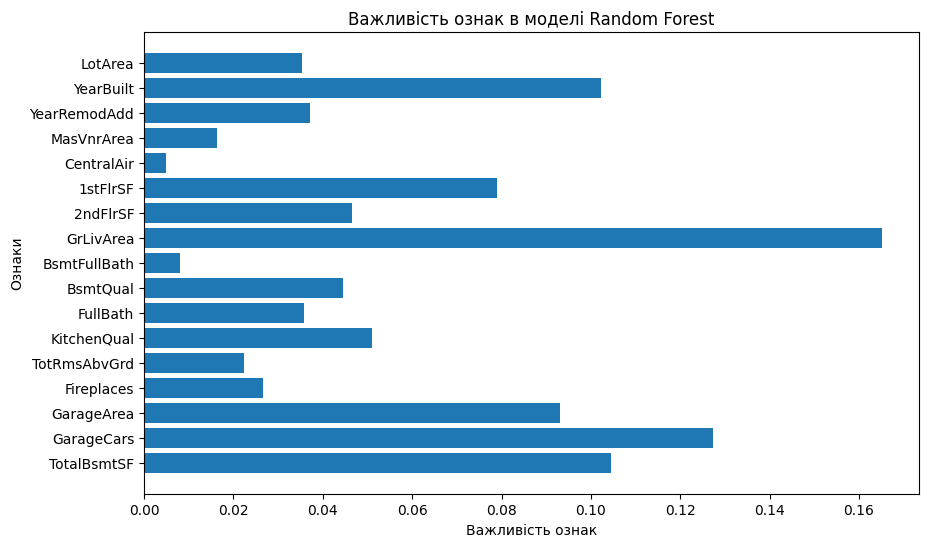

In [403]:
feature_importances = optimal_model.feature_importances_
feature_names = X_train.columns 

plt.figure(figsize=(10, 6))
plt.title("Важливість ознак в моделі Random Forest")
plt.barh(range(len(feature_importances)), feature_importances, align="center")
plt.yticks(range(len(feature_importances)), feature_names)
plt.xlabel("Важливість ознак")
plt.ylabel("Ознаки")
plt.gca().invert_yaxis()  

plt.show()

In [404]:
predict_test_data = optimal_model.predict(test_data)

In [405]:
predict_test_data

array([124165.74746347, 146515.26851804, 184889.02428571, ...,
       165656.6093195 , 122054.41213023, 227533.91295464])

In [ ]:
sample_submition = pd.read_csv("/Users/admin/Downloads/house-prices-advanced-regression-techniques/")

In [406]:
test_data['SalePrice'] = predict_test_data

In [407]:
test_data.head()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtQual,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageArea,GarageCars,TotalBsmtSF,SalePrice
0,11622,1961,1961,0.0,1,896,0,896,0.0,1,1,1,5,0,730.0,1.0,882.0,124165.747463
1,14267,1958,1958,108.0,1,1329,0,1329,0.0,1,1,2,6,0,312.0,1.0,1329.0,146515.268518
2,13830,1997,1998,0.0,1,928,701,1629,0.0,2,2,1,6,1,482.0,2.0,928.0,184889.024286
3,9978,1998,1998,20.0,1,926,678,1604,0.0,1,2,2,7,1,470.0,2.0,926.0,182950.789101
4,5005,1992,1992,0.0,1,1280,0,1280,0.0,2,2,2,5,0,506.0,2.0,1280.0,183860.968708


In [408]:
SalePrice_2 = test_data['SalePrice'].to_csv('ML Project House Prices_XGB.csv')